In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df_train = pd.read_csv("data/train.csv")

print("list columns:")
print(df_train.columns.values.tolist())

# Pclass: Ticket Class
# Sibsp: タイタニック号に乗船した兄弟姉妹・配偶者のうち
# Parch: タイタニック号に乗船した親と子の割合
# Fare: 旅客運賃
# Cabin: Cabin number
# Embarked: 乗船港

print("Num of data: " + str(len(df_train)))

print("Num of null data each category: ")
print(df_train.isnull().sum())
# Memo: AgeとCabinは分析に利用できなさそう

list columns:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Num of data: 891
Num of null data each category: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# https://www.kaggle.com/code/ngfkf1vv5ot6/qiita-titanic/notebook

df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [16]:
for column in df_train.columns:
    uniq = df_train[column].unique()

    print("{:20} unique:{:5} {}".format(
        column,
        len(uniq),
        uniq[:5],
    ))
# Survived  : 0 = No, 1 = Yes
# Pclass    : 1 = 1st, 2 = 2nd, 3 = 3rd
# Embarked  : C = Cherbourg, Q = Queenstown, S = Southampton

PassengerId          unique:  891 [1 2 3 4 5]
Survived             unique:    2 [0 1]
Pclass               unique:    3 [3 1 2]
Name                 unique:  891 ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry']
Sex                  unique:    2 ['male' 'female']
Age                  unique:   89 [22. 38. 26. 35. nan]
SibSp                unique:    7 [1 0 3 4 2]
Parch                unique:    7 [0 1 2 5 3]
Ticket               unique:  681 ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450']
Fare                 unique:  248 [ 7.25   71.2833  7.925  53.1     8.05  ]
Cabin                unique:  148 [nan 'C85' 'C123' 'E46' 'G6']
Embarked             unique:    4 ['S' 'C' 'Q' nan]


In [18]:
# 目的変数と各カラムの関係性の調査
# 予測したい変数のこと
# ref: http://www.gen-info.osaka-u.ac.jp/MEPHAS/express/express8.html

resp_var="Survived"
print("Num of response variable:")
print(df_train[resp_var].value_counts())

print("Normalize values count of response variable:")
print(df_train[resp_var].value_counts(normalize=True))

Num of response variable:
0    549
1    342
Name: Survived, dtype: int64
Normalize values count of response variable
0    0.616162
1    0.383838
Name: Survived, dtype: float64


list columns:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Survival rate for each category:
Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363
Survival rate for each category rate:
Survived         0         1
Pclass                      
1         0.145719  0.397661
2         0.176685  0.254386
3         0.677596  0.347953


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


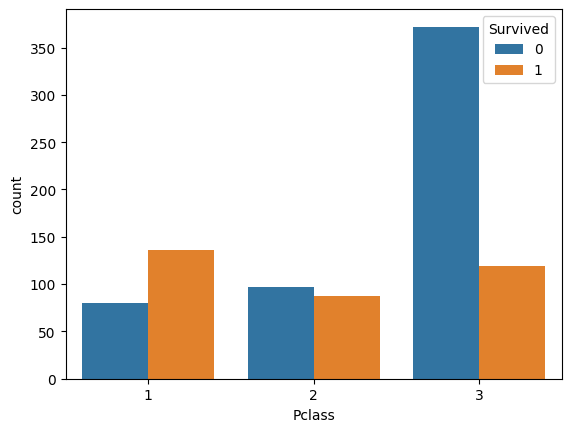

In [23]:
# ref: https://qiita.com/pocokhc/items/f20b1518fb36f4ad0d00
def plot_category(df, column, target_column):
    """
    crosstab:
    - pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)[source]
        - index: array-like, Series, or list of arrays/Series
            - Values to group by in the rows.
        - columns: array-like, Series, or list of arrays/Series
            - Values to group by in the columns.
    - カテゴリデータのカテゴリごとのサンプル数（出現回数・頻度）の算出などが可能
    - ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
    """
    print(pd.crosstab(df[column],df[target_column]))
    
    # If passed ‘all’ or True, will normalize over all values.
    # If passed ‘columns’ will normalize over each column.
    # If passed ‘index’ will normalize over each row
    print("Survival rate for each category:")
    print(pd.crosstab(df[column], df[target_column], normalize='index'))

    print("Survival rate for each category rate:")
    print(pd.crosstab(df[column],df[target_column], normalize='columns'))

    # plot
    sns.countplot(df[column], hue=df[target_column])
    plt.show()

print("list columns:")
print(df_train.columns.values.tolist())
resp_var="Survived"
expl_var="Pclass"

plot_category(df_train, expl_var,resp_var)